In [1]:
from pathlib import Path
import cv2
from pytorchyolo import detect, models

import numpy as np
import rasterio
from rasterio.plot import reshape_as_image
import geopandas as gpd
from shapely.geometry import Polygon

from matplotlib import pyplot as plt
from matplotlib import patches
from tqdm.notebook import tqdm

In [3]:
# Load the YOLO model
model = models.load_model(
  "PyTorch-YOLOv3/config/yolov3-custom.cfg", 
  "PyTorch-YOLOv3/checkpoints/yolov3_ckpt_202.pth"
)

In [50]:
# Load the image as a numpy array
img_p = "PyTorch-YOLOv3/data/custom/test_images/PNOA_MA_OF_ETRS89_HU31_h50_0724_test_486477_4357549.tif"
    
with rasterio.open(img_p) as src:
    # rasterio native shape is (bands, rows, columns) but we need (rows, columns, bands)
    # see https://rasterio.readthedocs.io/en/latest/topics/image_processing.html#imageorder
    img = reshape_as_image(src.read())
    tranform = src.transform
    
boxes = detect.detect_image(model, img, conf_thres=0.1, nms_thres=0.1)

print(boxes)

[[1.7471531e+01 2.6901578e+02 6.6817619e+01 3.0379605e+02 2.4018724e-01
  0.0000000e+00]
 [5.4222958e+01 4.1411862e+02 1.1223810e+02 4.5774460e+02 1.9482419e-01
  0.0000000e+00]]


In [51]:
def plot_yolo_result(img, boxes):
    fig, ax = plt.subplots(1, figsize=(10,10))
    ax.imshow(img)
    for x1, y1, x2, y2, conf, cls_pred in boxes:
        box_w = x2 - x1
        box_h = y2 - y1
        # Create a Rectangle patch
        bbox = patches.Rectangle((x1, y1), box_w, box_h, linewidth=2, edgecolor="red", facecolor="none")
        # Add the bbox to the plot
        ax.add_patch(bbox)
        # Add label
        plt.text(
            x1,
            y1,
            s=f"{conf.item():0.2f}",
            color="white",
            verticalalignment="top",
            bbox={"color": "red", "pad": 0})

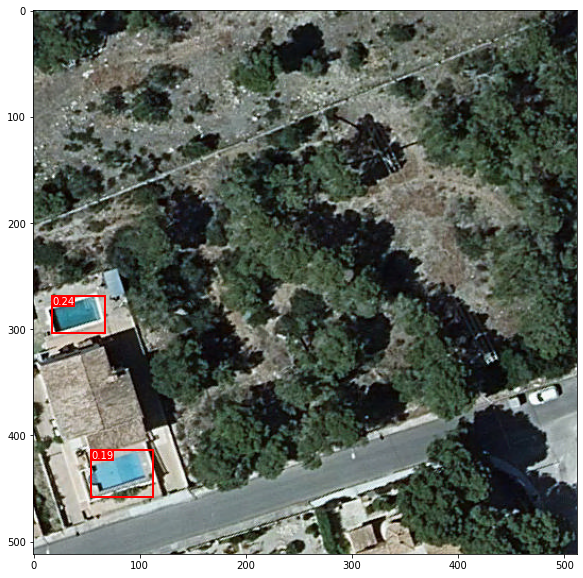

In [52]:
plot_result(img, boxes)

In [7]:
images = Path("0724_tiles/").glob("*.tif")

In [9]:
gdf = detection_to_geo(model, images)

0it [00:00, ?it/s]

In [10]:
gdf.head()

,geometry,confidence
0,"POLYGON ((502210.962 4357867.754, 502222.101 4...",0.160859
1,"POLYGON ((487068.299 4357396.384, 487078.697 4...",0.205362
2,"POLYGON ((505510.761 4360564.092, 505524.323 4...",0.146347
3,"POLYGON ((494028.664 4370694.214, 494035.793 4...",0.235828
4,"POLYGON ((511927.998 4362967.412, 511942.092 4...",0.214941


In [11]:
gdf.to_file("results/pool_results.shp", index=True)

In [ ]:
detect.detect()